##### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN---------------------------Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive

regression and clustering  algorithms are sencitive to outliers and classificatin algorithms are less sesitive 


In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

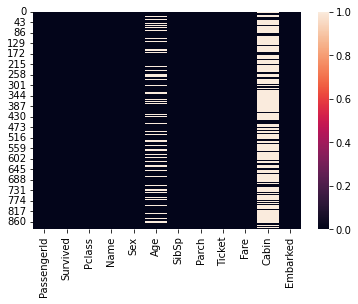

In [8]:
import seaborn as sns
sns.heatmap(df.isnull())

Age annd cabin are having missin values 

In [9]:
df['Age'].isnull().sum()

177

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

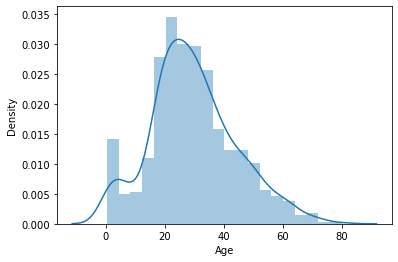

In [10]:
sns.distplot(df['Age'])

Age is lookig almost normally distributed just for understanding we will add outlier at the missing values in age 


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

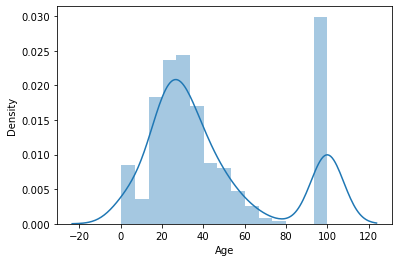

In [11]:
sns.distplot(df['Age'].fillna(100))

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


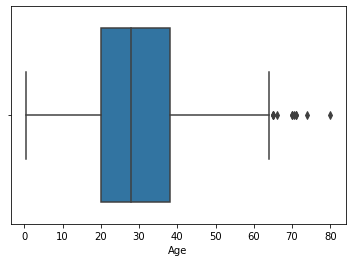

In [12]:
#lets check the outliers with the help of boxplot

figure = sns.boxplot(df['Age'])

In [13]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

####  case 1 :If The Data Is Normally Distributed We use this

In [16]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
upper_boundry = df['Age'].mean()+df['Age'].std() * 3
lower_boundry = df['Age'].mean()-df['Age'].std() * 3
print(lower_boundry), print(upper_boundry),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

here  our upper boundry for age is 73 so either we can remove thise records or we will reolace anything above 73 with 73 

#### case 2 :If Features Are Skewed We Use the below Technique

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

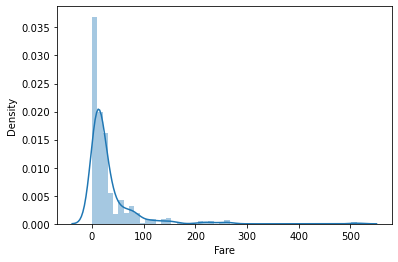

In [17]:
sns.distplot(df['Fare'])

<AxesSubplot:>

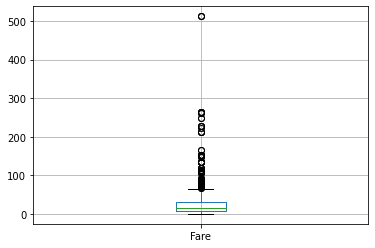

In [18]:
df.boxplot(column="Fare")

In [19]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [21]:
#in this case we will calculate lower bridge and upper bridge 
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [22]:
# inorder to calculate extream outliers multipy with 3 to IQR
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [25]:
#now usig the boundries calculated to replce the outliers 
data=df.copy()

data.loc[data['Age']>=73,'Age']=73
data.loc[data['Fare']>=100,'Fare']=100



C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

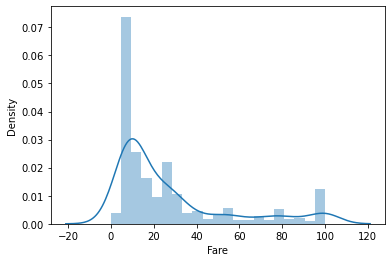

In [26]:
sns.distplot(data['Fare'])

In [27]:
#now lets apply logistic regression 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [29]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6828358208955224
roc_auc_score: 0.6449629227708447
